In [1]:
#import librabries
import tensorflow as tf                        #Import TensorFlow for DL
from tensorflow.keras import models, layers    #Import Keras models and layers for building neural networks  
import matplotlib.pyplot as plt                #Import Matplotlib for plotting graphs
import numpy as np                             #Import NumPy for numerical operations (arrays, math functions)11459 files belonging to 12 classes

In [2]:
import tensorflow as tf  
# Define the batch size and image size
BATCH_SIZE = 32                                #Number of images to process in one batch
IMAGE_SIZE = 256                               #Images will be resized to 256x256 pixels

# Load images from the dataset
images_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'PlantVillage',          #My dataset directory
    shuffle=True,       #Shuffle the images to ensure random order for better training
    image_size=(IMAGE_SIZE, IMAGE_SIZE),    #Resize images to 256x256 pixels
    batch_size=BATCH_SIZE,  #Use the predefined batch size (32 images per batch)
)


Found 11459 files belonging to 12 classes.


In [3]:
class_names=images_dataset.class_names      #Extract the list of class names from the dataset
class_names                                 #Display the class names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [4]:
len(images_dataset)                        #Get the number of batches in the dataset

359

In [5]:
#exploring the dataset
for image_batch, label_batch in images_dataset.take(1):   #Take one batch of images and labels
    print(image_batch.shape)                              #Print the shape of the image batch
    print(label_batch.numpy())                            #Print the labels in the batch as a NumPy array

(32, 256, 256, 3)
[ 5  2  5  6  7  4  5 10 10  6  6  6  6  7  8  6  1  2  5  3  5  1  2  2
  1  8  7  9  7  7  0  3]


In [6]:
for image_batch, label_batch in images_dataset.take(1):      #print first image in that batch
    print(image_batch[0].numpy())                            #Convert the first image in the batch to a NumPy array and print its pixel values
    
'''
[Red. Green. Blue.]
[Yellow. Cyan. Magenta.]
[Gray. Black. White.]
'''

[[[155. 147. 158.]
  [155. 147. 158.]
  [156. 148. 159.]
  ...
  [147. 139. 150.]
  [148. 140. 151.]
  [148. 140. 151.]]

 [[155. 147. 158.]
  [156. 148. 159.]
  [156. 148. 159.]
  ...
  [146. 138. 149.]
  [146. 138. 149.]
  [146. 138. 149.]]

 [[157. 149. 160.]
  [157. 149. 160.]
  [157. 149. 160.]
  ...
  [144. 136. 147.]
  [144. 136. 147.]
  [144. 136. 147.]]

 ...

 [[117. 110. 118.]
  [117. 110. 118.]
  [115. 108. 116.]
  ...
  [112. 105. 113.]
  [112. 105. 113.]
  [111. 104. 112.]]

 [[132. 125. 133.]
  [129. 122. 130.]
  [125. 118. 126.]
  ...
  [112. 105. 113.]
  [113. 106. 114.]
  [111. 104. 112.]]

 [[120. 113. 121.]
  [118. 111. 119.]
  [114. 107. 115.]
  ...
  [118. 111. 119.]
  [119. 112. 120.]
  [118. 111. 119.]]]


'\n[Red. Green. Blue.]\n[Yellow. Cyan. Magenta.]\n[Gray. Black. White.]\n'

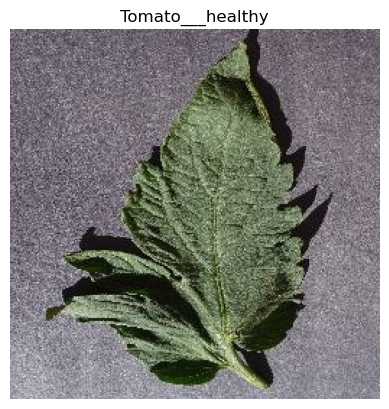

In [7]:
#visualize the first image in that batch
for image_batch, label_batch in images_dataset.take(1):      #Take one batch from the dataset
    plt.imshow(image_batch[0].numpy().astype('uint8'))       #Display the first image in the batch
    plt.title(class_names[label_batch[0]])                   #Set the title as the corresponding class name
    plt.axis('off')

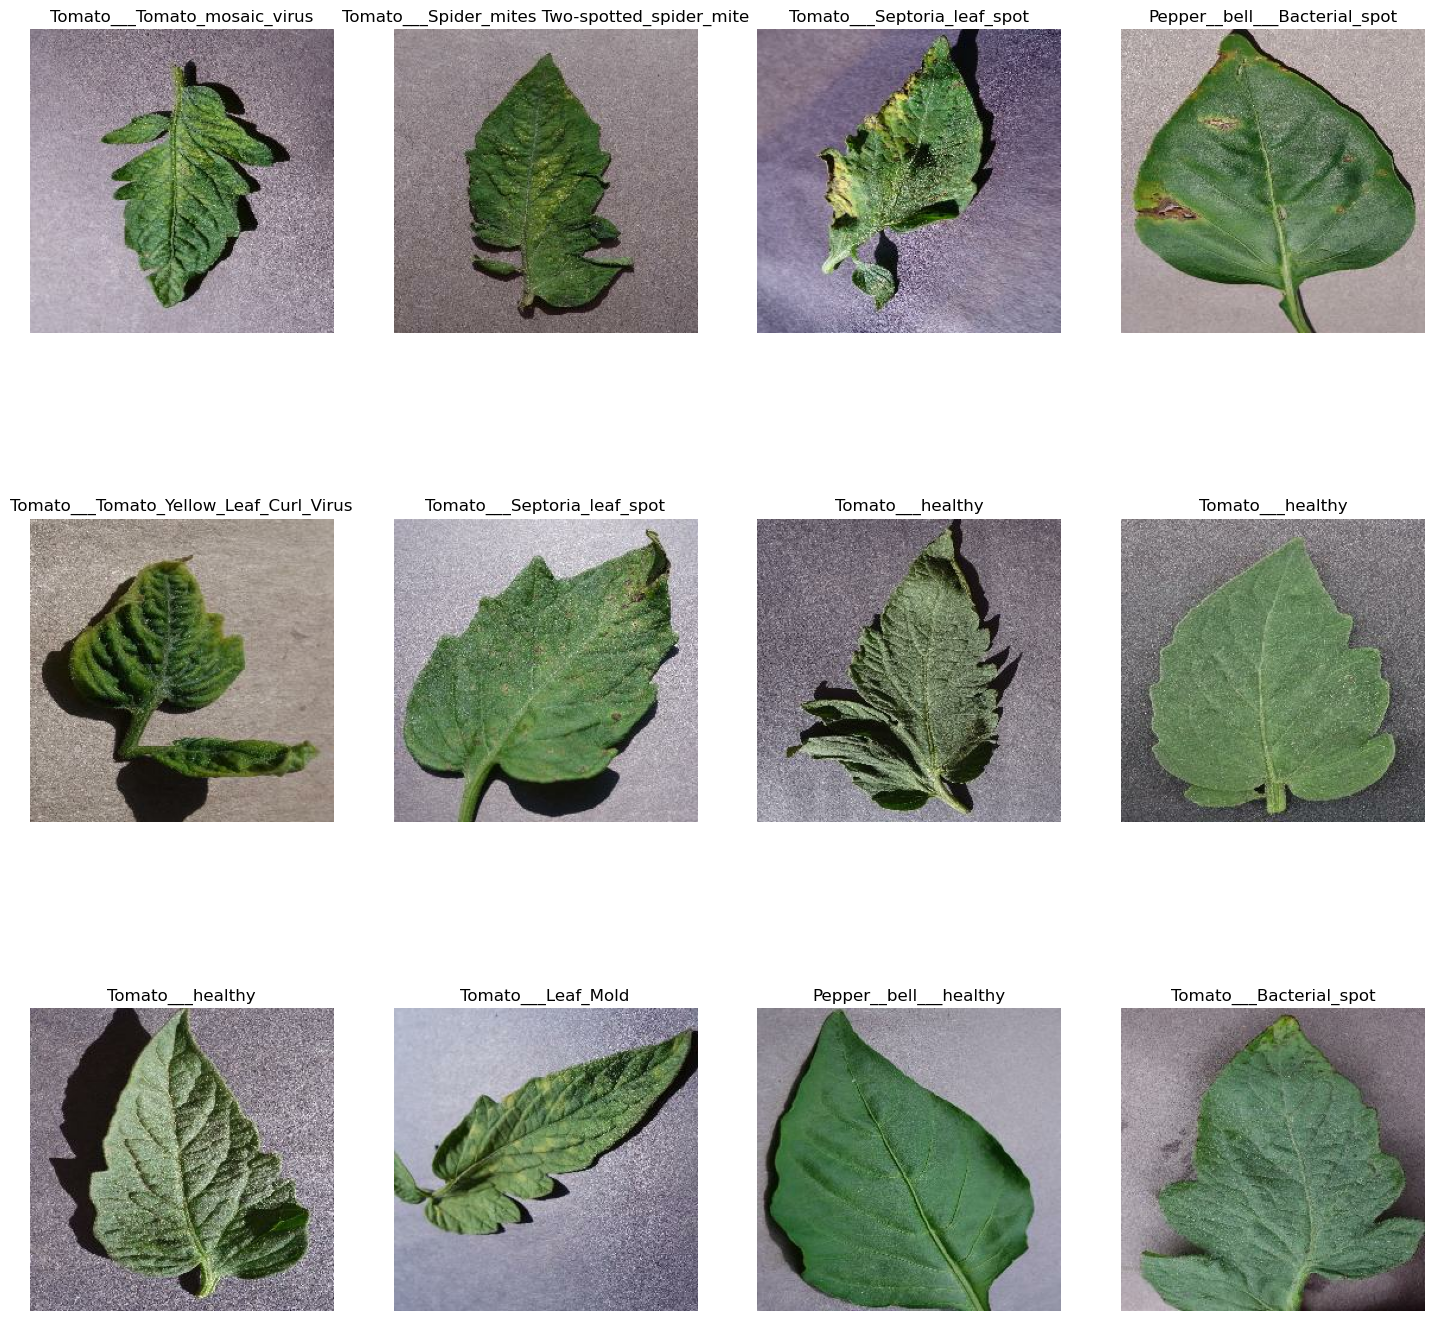

In [8]:
#Visualize the first image in that batch
plt.figure(figsize=(18,18))                                 #Set the figure size for the plot
for image_batch, label_batch in images_dataset.take(1):     #Take one batch of images and labels
    for i in range (12):                                    #Loop through the first 12 images in the batch
        ax=plt.subplot(3,4, i+1)                            #Create a subplot in a 3x4 grid
        plt.imshow(image_batch[i].numpy().astype('uint8'))  #Convert and display the image
        plt.title(class_names[label_batch[i]])              #Set the title as the class name
        plt.axis('off')

In [9]:
# Count the total number of batches in the images dataset
len(images_dataset)      #len() returns the number of batches available

359

In [10]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1, test_split=0.1,shuffle=True, shuffle_size=10000):   
#Function to split a TensorFlow dataset into training, validation, and test sets.
   
    
    ds_size=len(ds)       #Get the total number of samples in the dataset
    #Shuffle the dataset if required
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)   #Randomly shuffle the dataset using a set seed to get the same results every time.
        
    #Calculate the number of samples for training, validation, and testing
    train_size= int(train_split* ds_size)      #Number of training samples
    val_size=int(val_split* ds_size)           #Number of validation samples
    
    train_ds=ds.take(train_size)               #Create the training dataset by taking the first portion of samples
    
    val_ds=ds.skip(train_size).take(val_size)  #Create the validation dataset by skipping training samples and taking the next portion
    
    test_ds=ds.skip(train_size).skip(val_size) #Create the testing dataset by skipping both training and validation samples
    
    #Return the three datasets
    return train_ds, val_ds, test_ds

In [11]:
# Split the images_dataset into training, validation, and test datasets using the defined function.
train_ds, val_ds, test_ds = get_dataset_partitions_tf(images_dataset)



In [12]:
#Print the number of samples in the training, validation, and test datasets.
print(len(train_ds),len(val_ds),len(test_ds))

287 35 37


In [13]:
#Store the training dataset in memory for faster access, shuffle it to mix the order, 
#and prepare it to load data efficiently while training
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

#Store the validation dataset in memory for faster access, shuffle it, 
#and prepare it to load data efficiently during validation
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

#Store the test dataset in memory for faster access, shuffle it, 
#and prepare it to load data efficiently while testing
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [14]:
import tensorflow as tf

IMAGE_SIZE = 256  

#Create a sequential model for image preprocessin
resize_and_rescale = tf.keras.Sequential([
tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),  #Resize images to the specified IMAGE_SIZE
tf.keras.layers.Rescaling(1.0 / 255)               #Scale pixel values to the range [0, 1]
])

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#Define data augmentation techniques to apply to images
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),     #Randomly flip images both horizontally and vertically
    layers.RandomRotation(0.2)                        #Randomly flip images both horizontally and vertically
])

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Constants
IMAGE_SIZE = 256  # Image dimensions
CHANNELS = 3  # Number of color channels (3 for RGB)
n_classes = 12  # Number of output classes

# Resizing and rescaling layers
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])

# Data augmentation layers
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

# Define the model
model = models.Sequential([
    layers.InputLayer(input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS), batch_size=32),  # Explicit batch size
    resize_and_rescale,  # Resize and rescale input images
    data_augmentation,    # Apply data augmentation
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),  # Output layer for n_classes
])
# Print the model summary
model.summary()

"""
CNN Model Architecture:

Input Layer: Sets the shape of the input images and the batch size.

Resizing and Rescaling: Adjusts image size and normalizes pixel values.

Data Augmentation: Randomly changes images (like flipping and rotating) to improve training.

Convolutional Layers: Extract important features from images using filters and ReLU activation.

MaxPooling Layers: Reduce the size of the feature maps, helping the model focus on key details.

Flatten Layer: Changes the multi-dimensional output into a single line of numbers for processing.

Dense Layers: A fully connected layer with 64 units followed by an output layer that gives probabilities for each class.
"""

C:\Users\rajhi\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_3 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 12)                    │             780 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 184,332 (720.05 KB)

 Trainable params: 184,332 (720.05 KB)

 Non-trainable params: 0 (0.00 B)

'\nCNN Model Architecture:\n\nInput Layer: Sets the shape of the input images and the batch size.\n\nResizing and Rescaling: Adjusts image size and normalizes pixel values.\n\nData Augmentation: Randomly changes images (like flipping and rotating) to improve training.\n\nConvolutional Layers: Extract important features from images using filters and ReLU activation.\n\nMaxPooling Layers: Reduce the size of the feature maps, helping the model focus on key details.\n\nFlatten Layer: Changes the multi-dimensional output into a single line of numbers for processing.\n\nDense Layers: A fully connected layer with 64 units followed by an output layer that gives probabilities for each class.\n'

In [17]:
model.compile(
    optimizer='adam',  # You can change the optimizer if needed
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  #Ensure correct loss function
    metrics=['accuracy']  #Ensure you're tracking accuracy
)

#Now evaluate the model
scores = model.evaluate(test_ds, verbose=1)

#Print the test loss and accuracy
print(f"Test Loss: {scores[0]}")
print(f"Test Accuracy: {scores[1]}")



37/37 ━━━━━━━━━━━━━━━━━━━━ 40s 320ms/step - accuracy: 0.0781 - loss: 2.4862
Test Loss: 2.486245632171631
Test Accuracy: 0.08530405163764954


In [18]:
history

#import librabries
import tensorflow as tf                        #Import TensorFlow for DL
from tensorflow.keras import models, layers    #Import Keras models and layers for building neural networks  
import matplotlib.pyplot as plt                #Import Matplotlib for plotting graphs
import numpy as np                             #Import NumPy for numerical operations (arrays, math functions)
import tensorflow as tf  
# Define the batch size and image size
BATCH_SIZE = 32                                #Number of images to process in one batch
IMAGE_SIZE = 256                               #Images will be resized to 256x256 pixels

# Load images from the dataset
images_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'PlantVillage',          #My dataset directory
    shuffle=True,       #Shuffle the images to ensure random order for better training
    image_size=(IMAGE_SIZE, IMAGE_SIZE),    #Resize images to 256x256 pixels
    batch_size=BATCH_SIZE,  #Use the pred

In [19]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

TOTAL_EPOCHS = 50  # Set the total number of epochs to train
BATCH_SIZE = 32  # Define your batch size

# Set a lower learning rate
optimizer = Adam(learning_rate=0.0001)

# Compile the model with the new optimizer
model.compile(
    optimizer=optimizer,    #Use the Adam optimizer to adjust weights
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']    #Track accuracy during training and evaluation
)


# Increased patience and switched to monitor 'val_accuracy'
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    train_ds,
    epochs=TOTAL_EPOCHS,
    validation_data=val_ds,
    callbacks=[early_stopping],
    verbose=1
)

# Collect history metrics for plotting
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS = TOTAL_EPOCHS  



Epoch 1/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 346s 1s/step - accuracy: 0.1061 - loss: 2.4526 - val_accuracy: 0.3313 - val_loss: 1.9936
Epoch 2/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 273s 951ms/step - accuracy: 0.3410 - loss: 1.9329 - val_accuracy: 0.4795 - val_loss: 1.5877
Epoch 3/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 259s 902ms/step - accuracy: 0.4900 - loss: 1.4766 - val_accuracy: 0.5429 - val_loss: 1.3320
Epoch 4/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 259s 902ms/step - accuracy: 0.5874 - loss: 1.2140 - val_accuracy: 0.5161 - val_loss: 1.4132
Epoch 5/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 258s 897ms/step - accuracy: 0.6342 - loss: 1.0540 - val_accuracy: 0.5491 - val_loss: 1.3645
Epoch 6/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 257s 895ms/step - accuracy: 0.6691 - loss: 0.9722 - val_accuracy: 0.5750 - val_loss: 1.2915
Epoch 7/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 256s 891ms/step - accuracy: 0.6873 - loss: 0.9119 - val_accuracy: 0.6054 - val_loss: 1.2149
Epoch 8/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 252s 879ms/step - accuracy: 0.7062 - lo

Training Accuracy Length: 48
Validation Accuracy Length: 48
Training Loss Length: 48
Validation Loss Length: 48


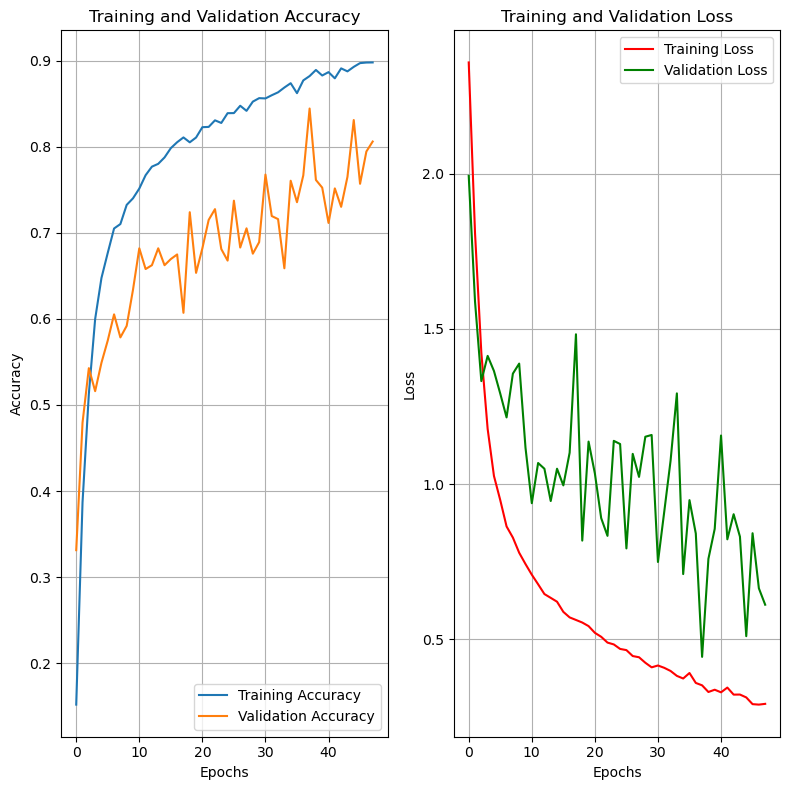

"\nThe graph shows how the model is performing over 50 training cycles (epochs):\n\nAccuracy (Left Side):\n\nThe blue line shows the model getting better on the training data, reaching 98% accuracy by the end.\nThe orange line shows how the model performs on new data it hasn't seen before (validation data). \nThe performance is not steady—it goes up and down a lot.\nThis suggests the model might be overfitting—doing well on training data but struggling with new data.\n\nLoss (Right Side):\n\nThe red line shows the model's error on the training data decreasing steadily, meaning it's improving.\n\nThe green line for validation loss is unstable, going up and down, just like the validation accuracy, showing inconsistent performance.\nThe model is learning well on training data but not generalizing well to new data. \nTo fix this, I need to reduce overfitting by using techniques like dropout, regularization, or adding more data.\n"

In [20]:
import matplotlib.pyplot as plt

#Collect metrics from the history
acc = history.history['accuracy']  # Accumulated training accuracy
val_acc = history.history['val_accuracy']  # Accumulated validation accuracy
loss = history.history['loss']  # Accumulated training loss
val_loss = history.history['val_loss']  # Accumulated validation loss

#Check the lengths of acc, val_acc, loss, and val_loss to ensure they are populated
print(f"Training Accuracy Length: {len(acc)}")
print(f"Validation Accuracy Length: {len(val_acc)}")
print(f"Training Loss Length: {len(loss)}")
print(f"Validation Loss Length: {len(val_loss)}")

#Make sure EPOCHS matches the length of acc
EPOCHS = len(acc)  # Use the length of the collected accuracy data

#Plotting training and validating accuracy and loss
plt.figure(figsize=(8,8))

#Plotting training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid() 

#Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss', color='red')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss', color='green')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid() 


plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot


"""
The graph shows how the model is performing over 50 training cycles (epochs):

Accuracy (Left Side):

The blue line shows the model getting better on the training data, reaching 98% accuracy by the end.
The orange line shows how the model performs on new data it hasn't seen before (validation data). 
The performance is not steady—it goes up and down a lot.
This suggests the model might be overfitting—doing well on training data but struggling with new data.

Loss (Right Side):

The red line shows the model's error on the training data decreasing steadily, meaning it's improving.

The green line for validation loss is unstable, going up and down, just like the validation accuracy, showing inconsistent performance.
The model is learning well on training data but not generalizing well to new data. 
To fix this, I need to reduce overfitting by using techniques like dropout, regularization, or adding more data.
"""



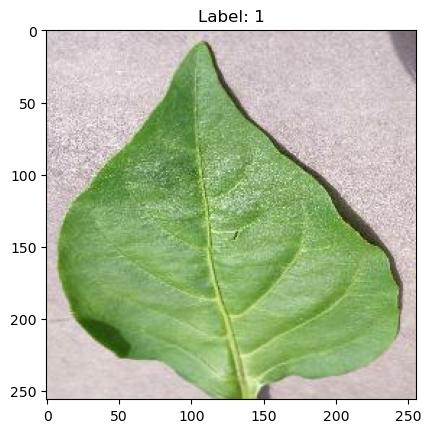

In [21]:
import matplotlib.pyplot as plt

#Making predictions
for images_batch, label_batch in test_ds.take(1):          #Take one batch of images from the test dataset
    plt.imshow(images_batch[0].numpy().astype('uint8'))    #Display the first image i
    plt.title(f"Label: {label_batch[0].numpy()}")          #Show the label (class) of the first image


The model is now making predictions on the first image...


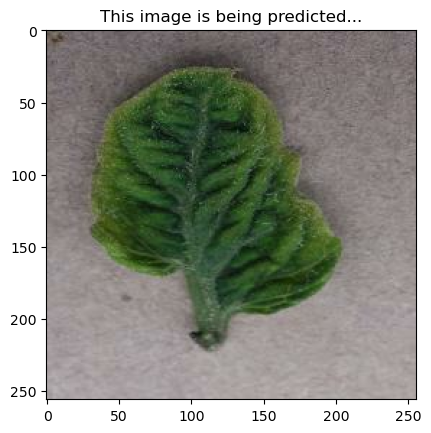

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step
The model thinks this image looks like a Tomato___Tomato_Yellow_Leaf_Curl_Virus.
The actual label for this image is: Tomato___Tomato_Yellow_Leaf_Curl_Virus
The model predicted correctly!


In [22]:
import matplotlib.pyplot as plt

# Informing the user that the model is starting to make predictions
print("The model is now making predictions on the first image...")

# Take one batch of images from the test dataset
for images_batch, label_batch in test_ds.take(1):
    # Extract the first image and its true label
    image1 = images_batch[0].numpy().astype('uint8')  # Convert the first image to displayable format
    label1 = label_batch[0].numpy()  # Get the true label index for the first image

    # Display the first image to the user
    plt.imshow(image1)
    plt.title("This image is being predicted...")  # Let the user know which image is being predicted
    plt.show()

    # Predict the labels for the batch of images
    batch_prediction = model.predict(images_batch)

    # Get the predicted label for the first image in the batch
    predicted_label = class_names[np.argmax(batch_prediction[0])]  # Convert prediction to class name

    # Display information about the current image and its prediction
    print(f"The model thinks this image looks like a {predicted_label}.")
    
    # Find the true label of the image
    true_label_name = class_names[label1]
    print(f"The actual label for this image is: {true_label_name}")

    # Check if the prediction is correct and inform the user
    if predicted_label == true_label_name:
        print("The model predicted correctly!")
    else:
        print(f"The model was incorrect. It predicted {predicted_label}, but the correct label is {true_label_name}.")




In [23]:
# Function to predict with confidence
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    predicted_class = classes[np.argmax(predictions[0])] 
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


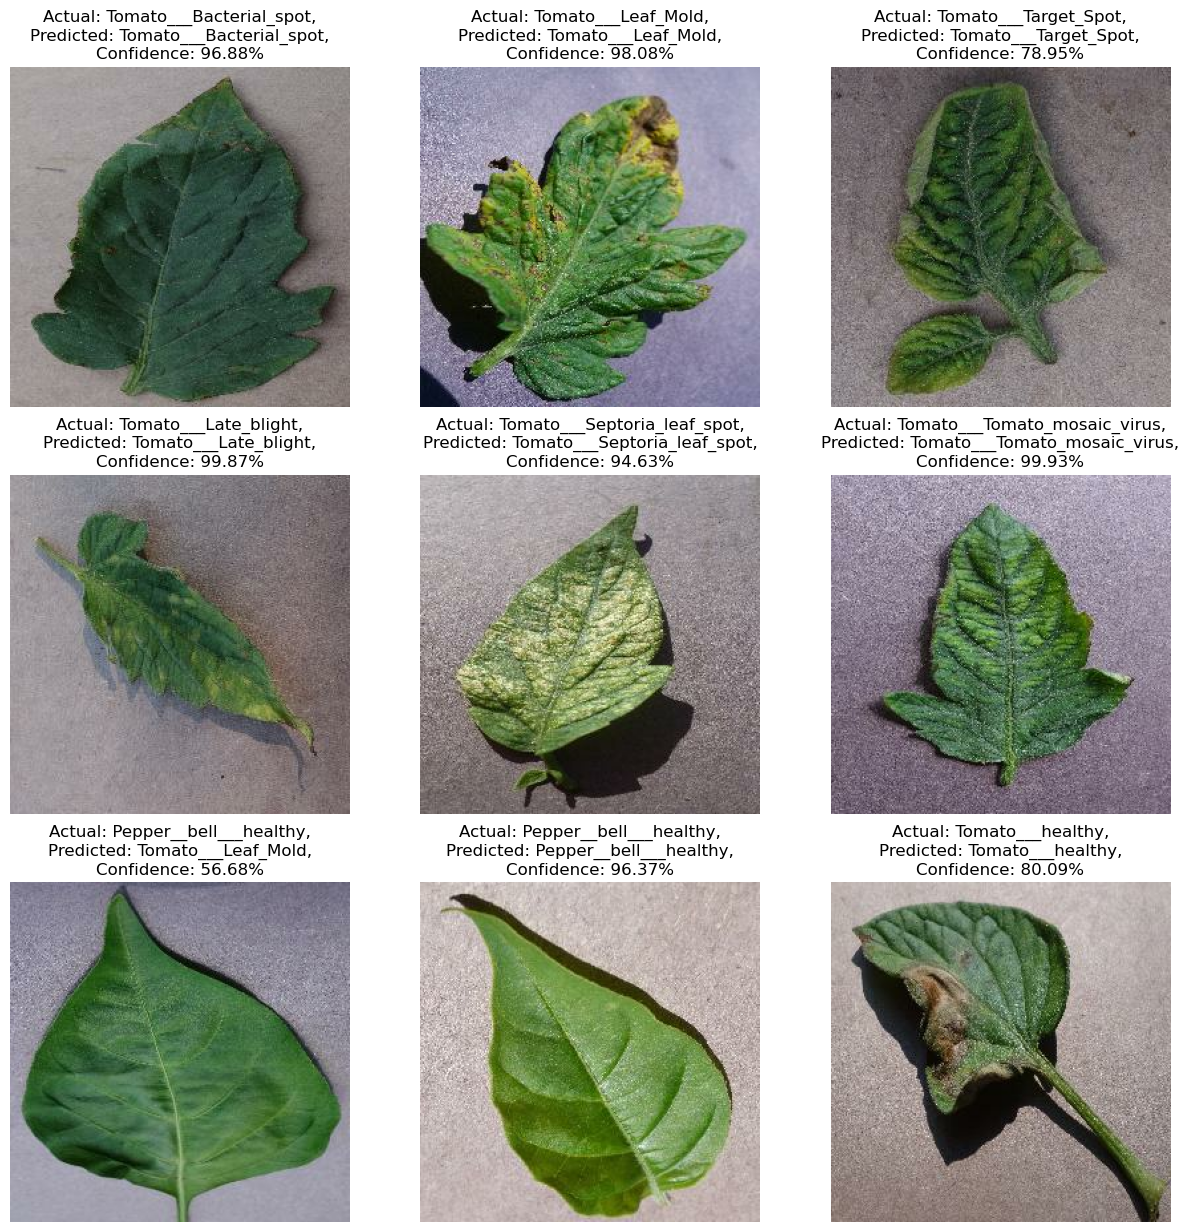

In [24]:
# Function to predict with confidence
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)  # Convert the image to an array format
    img_array = tf.expand_dims(img_array, 0)  # Add a batch dimension to the image array

    predictions = model.predict(img_array)  # Get model predictions for the image

    # Use class_names instead of classes
    predicted_class = class_names[np.argmax(predictions[0])]  # Determine the predicted class based on the highest prediction score
    confidence = round(100 * (np.max(predictions[0])), 2)  # Calculate confidence as a percentage
    return predicted_class, confidence

# Updated class_names definition:
class_names = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___healthy','Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot','Tomato___Tomato_mosaic_virus','Tomato___Tomato_Yellow_Leaf_Curl_Virus'  ]

plt.figure(figsize=(15, 15))  #Define the figure size
for images, labels in test_ds.take(1):  #Assuming test_ds is correctly defined
    for i in range(9):  #Loop to predict and display 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))  #Display the image

        # Call the predict function, passing each image
        predicted_class, confidence = predict(model, images[i].numpy())

        # Get the actual class label
        actual_class = class_names[labels[i]]

        # Set title with actual, predicted class, and confidence
        plt.title(f"Actual: {actual_class},\nPredicted: {predicted_class},\nConfidence: {confidence}%")
        plt.axis("off")  # Hide axis for cleaner presentation
plt.show()  # Display all 9 images and their predictions






In [58]:
import os

# Define the Downloads path and create 'Models' folder if it doesn't exist
downloads_path = os.path.join(os.path.expanduser("~"), "Downloads", "Model_v2")
os.makedirs(downloads_path, exist_ok=True)

# Define the model version
model_version = 1

# Save the model with the '.keras' extension in the 'Models' folder in Downloads
model.save(os.path.join(downloads_path, f"model_version_{model_version}.keras"))

print(f"Model version {model_version} saved successfully at {downloads_path}")



Model version 1 saved successfully at C:\Users\rajhi\Downloads\Model_v2


In [26]:
from tensorflow import keras
import os

# Define the Downloads path where the model is saved
downloads_path = os.path.join(os.path.expanduser("~"), "Downloads", "Model_v2")

# Load the saved model from the 'Models' folder in Downloads
model_version = 1
model = keras.models.load_model(os.path.join(downloads_path, f"model_version_{model_version}.keras"))

print("Model loaded successfully and ready for use.")



Model loaded successfully and ready for use.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

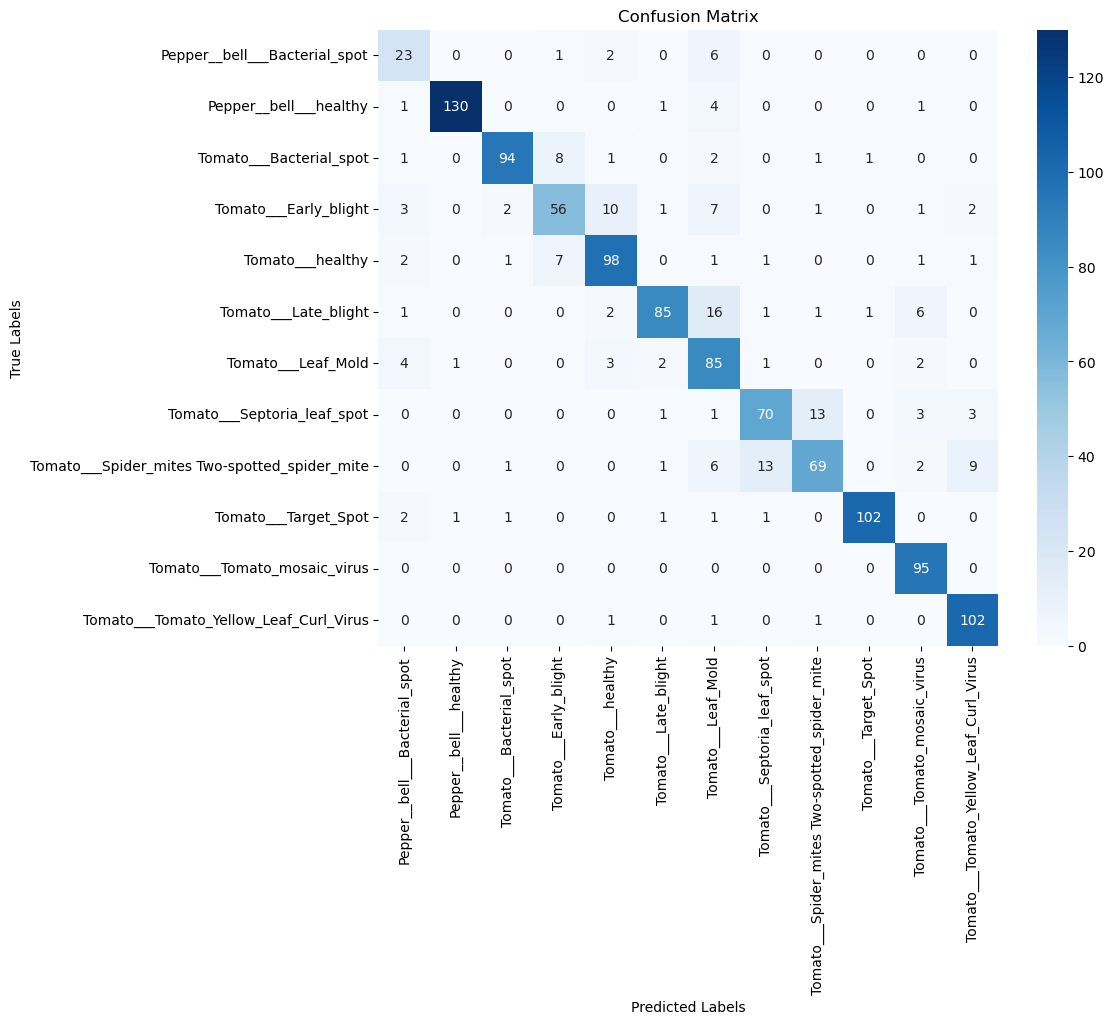

In [27]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming class_names and test_ds are already defined in your code

# Empty lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Loop through the test dataset batches
for images, labels in test_ds:
    predictions = model.predict(images)  # Make predictions on the batch
    true_labels.extend(labels.numpy())  # Convert true labels to numpy array
    predicted_labels.extend(np.argmax(predictions, axis=1))  # Convert predictions to class indices

# Generate the confusion matrix using sklearn
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
